In [65]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc

In [3]:
df = pd.read_csv('data_by_genres.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [5]:
df.describe()

,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,2973.000000,2973.000000,2973.000000,2.973000e+03,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000
mean,0.833165,0.401241,0.537187,2.517209e+05,0.561143,0.211366,0.192800,-10.509848,0.083588,119.018723,0.492748,39.919185,5.938782
std,0.372891,0.319760,0.150668,9.465686e+04,0.234486,0.267329,0.092356,5.369202,0.080483,17.469188,0.201820,16.748723,3.368110
min,0.000000,0.000003,0.056900,3.094600e+04,0.001002,0.000000,0.022200,-41.825000,0.023800,47.135722,0.003353,0.000000,0.000000
25%,1.000000,0.119050,0.441202,2.063788e+05,0.395058,0.004835,0.137687,-12.427656,0.044900,109.198143,0.348578,32.491279,3.000000
50%,1.000000,0.321745,0.546496,2.375453e+05,0.601195,0.080700,0.178764,-9.221817,0.059457,119.194167,0.500048,43.056569,7.000000
75%,1.000000,0.673991,0.647500,2.772720e+05,0.730127,0.343333,0.220856,-6.920125,0.091000,127.508750,0.640257,51.138889,9.000000
max,1.000000,0.996000,0.929000,2.382587e+06,0.994667,0.992000,0.960000,0.060000,0.946219,204.212000,0.980000,80.666667,11.000000


In [6]:
df.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


Padronizando os dados

In [7]:
scaler = StandardScaler()
atributos = ['mode', 'acousticness', 'danceability', 'duration_ms',	'energy',	'instrumentalness',	'liveness' , 'loudness', 'speechiness', 'tempo', 'valence' , 'popularity', 'key']
df[atributos] = scaler.fit_transform(df[atributos])
df[atributos].mean()

mode                1.015744e-17
acousticness       -1.386192e-16
danceability        4.779971e-18
duration_ms        -2.115137e-16
energy             -3.226481e-16
instrumentalness   -9.559943e-18
liveness            6.213963e-17
loudness           -2.198787e-16
speechiness        -8.723448e-17
tempo               4.684372e-16
valence             8.603948e-17
popularity         -3.656678e-16
key                -1.194993e-16
dtype: float64

In [8]:
U, S, V = np.linalg.svd(df[atributos], full_matrices= False) ## Fazendo o SVD
U @ np.diag(S) @ V

array([[ 0.44748433,  1.80819676, -2.48471886, ..., -1.92760907,
        -0.72171978,  0.01817872],
       [ 0.44748433,  0.29257799, -1.57893122, ..., -1.34299618,
         0.7512771 , -0.27877364],
       [ 0.44748433,  1.12840682,  1.16044852, ...,  2.38991988,
         0.4825547 ,  0.31513108],
       ...,
       [ 0.44748433, -0.43158249,  1.40532576, ...,  1.6421528 ,
         0.40293325, -0.27877364],
       [-2.23471511,  1.85094428,  1.11840634, ...,  1.22036371,
        -2.38381762,  0.31513108],
       [ 0.44748433,  0.0619243 ,  0.61218797, ...,  1.56500441,
        -0.57669499,  0.31513108]])

In [9]:
np.linalg.norm((U @ np.diag(S) @ V) - df[atributos]) ## De acordo com a norma de Frobenius, as matrizes são praticamente iguais

2.4229192338281295e-13

Vendo a relevância de cada componente principal

In [10]:
S/S.sum() * 100

array([16.56336512, 10.57028663,  9.47052047,  8.65686273,  8.51108941,
        7.89738923,  7.8045844 ,  7.36327996,  6.70396008,  6.190363  ,
        4.56209679,  3.56792531,  2.13827688])

In [11]:
(U[0:2].T @ np.diag(S[0:2]) @ V[0:2]).shape

(13, 13)

(0.95, 2.0)

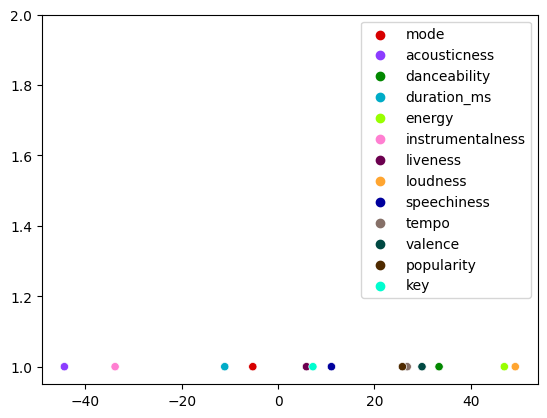

In [20]:

sns.scatterplot(x =V[0] * S[0] , y = [1] * 13, hue = atributos, palette= sns.color_palette(cc.glasbey_bw,13))
plt.ylim([0.95,2])

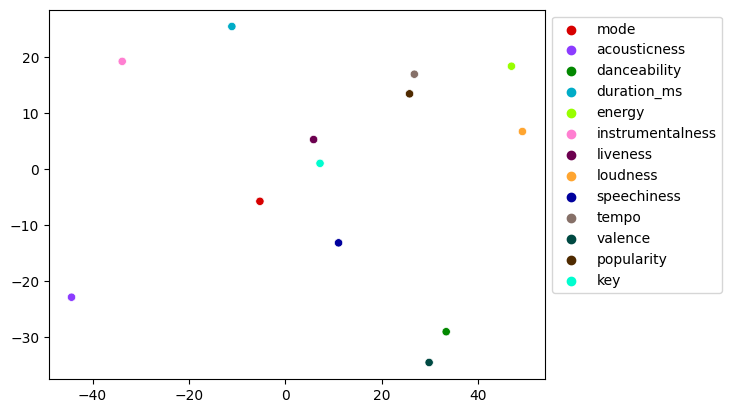

In [19]:
ax = sns.scatterplot(x = V[0] * S[0] , y = V[1] * S[1], hue = atributos, palette= sns.color_palette(cc.glasbey_bw,13))
sns.move_legend(ax,'upper left', bbox_to_anchor = (1,1) )

In [40]:
kmeans = KMeans(n_clusters= 4)
kmeans.fit(X = (V[0] * S[0]).reshape(-1,1) , y = V[1] * S[1])
kmeans.labels_

/home/thalles/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 2, 1, 0, 3, 2, 0, 3, 0, 1, 1, 1, 0], dtype=int32)

<AxesSubplot: >

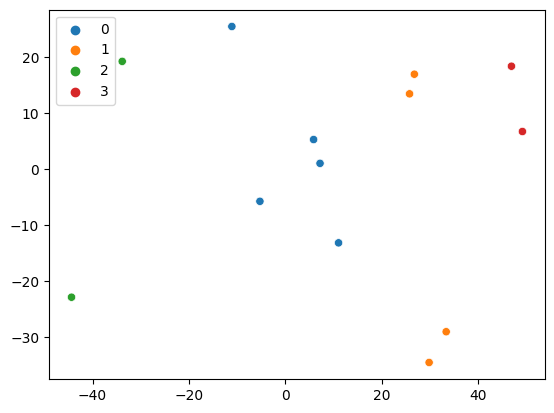

In [41]:
sns.scatterplot(x = V[0] * S[0] , y = V[1] * S[1], hue = kmeans.labels_, palette= 'tab10')

In [66]:
kmeans = KMeans(n_clusters= 6)
kmeans.fit(V @ np.diag(S))
kmeans.labels_

/home/thalles/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 2, 1, 5, 1, 3, 0, 1, 1, 2, 2, 4, 4], dtype=int32)

In [67]:
clusters = [[] for i in range(6)]
for atributo, cluster in zip(atributos, kmeans.labels_):
    clusters[cluster].append(atributo)
clusters


[['liveness'],
 ['mode', 'danceability', 'energy', 'loudness', 'speechiness'],
 ['acousticness', 'tempo', 'valence'],
 ['instrumentalness'],
 ['popularity', 'key'],
 ['duration_ms']]